In [214]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples, silhouette_score
from turtle import color
import seaborn as sns
from sklearn.manifold import TSNE

In [215]:
df = pd.read_csv('../feature_engineering/data_train.csv')

print(df.shape)
df.info()
df.head()

(1243, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hãng Sản Xuất   1243 non-null   int64  
 1   Độ Dày          1243 non-null   float64
 2   Trọng Lượng     1243 non-null   float64
 3   Bộ Nhớ          1243 non-null   float64
 4   Dung Lượng Pin  1243 non-null   float64
 5   Giá Bán         1243 non-null   float64
 6   Số Lõi          1243 non-null   float64
 7   Cache           1243 non-null   float64
 8   Độ Phân Giải    1243 non-null   int64  
 9   Hãng GPU        1243 non-null   int64  
 10  Phân Loại       1243 non-null   object 
dtypes: float64(7), int64(3), object(1)
memory usage: 106.9+ KB


,Hãng Sản Xuất,Độ Dày,Trọng Lượng,Bộ Nhớ,Dung Lượng Pin,Giá Bán,Số Lõi,Cache,Độ Phân Giải,Hãng GPU,Phân Loại
0,0,0.036957,-0.797910,-0.252758,0.016294,-0.932262,0.646254,-1.062658,5,2,Di động / Mỏng nhẹ / Ultrabook
1,0,2.001957,1.752278,2.164292,0.016294,0.155914,-0.454903,0.201346,4,4,Kỹ thuật / Lập trình
2,5,0.060074,0.552189,-0.252758,0.016294,-0.265452,-1.831348,-0.746657,5,2,Văn phòng / Học tập
3,2,0.036957,-0.047855,-0.252758,0.016294,-0.545355,1.196832,1.149348,4,2,Kỹ thuật / Lập trình
4,3,0.522427,0.402178,-0.252758,0.016294,-0.079858,-1.556059,-0.746657,8,4,Văn phòng / Học tập


In [216]:
df.drop(columns=['Phân Loại'], inplace=True)

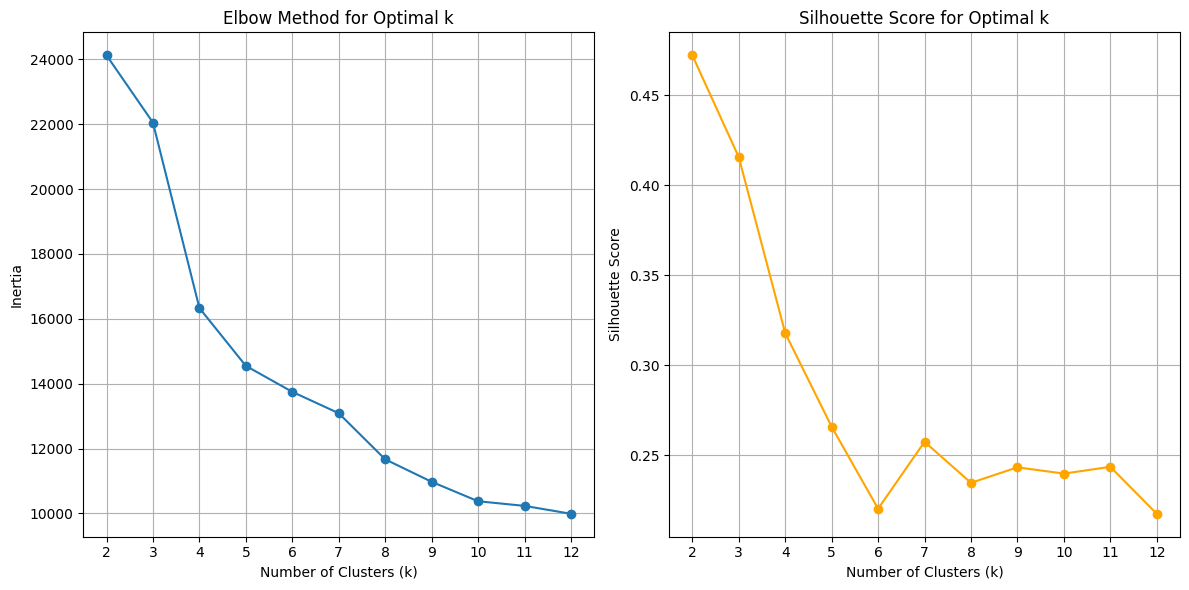

In [217]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300)
    cluster_label = kmeans.fit_predict(df)
    sil_score = silhouette_score(df, cluster_label)

    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

chọn k = 4

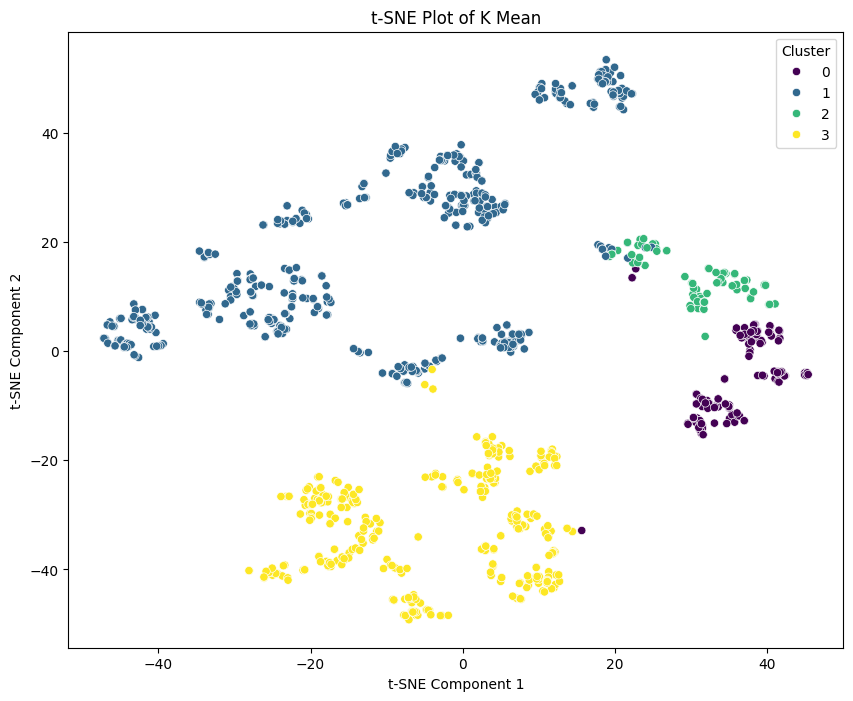

In [218]:
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, max_iter=300, random_state=42)

tsne = TSNE(n_components=2, random_state=42).fit_transform(df)
# embedded_data = tsne.fit_transform(df)

clusters = kmeans.fit_predict(df)

df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('t-SNE Plot of K Mean')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()
# df.drop(columns=['Cluster'], inplace=True)


# # Giảm chiều bằng t-SNE
# tsne_data = TSNE(n_components=2, random_state=42).fit_transform(df)

# # Fit K-Means trên dữ liệu đã giảm chiều
# kmeans = KMeans(n_clusters=4, max_iter=300, random_state=42)
# clusters = kmeans.fit_predict(tsne_data)

# # Tạo DataFrame tạm để vẽ
# tsne_df = pd.DataFrame(tsne_data, columns=['t-SNE Component 1', 't-SNE Component 2'])
# tsne_df['Cluster'] = clusters

# # Vẽ scatter plot
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Cluster', data=tsne_df, palette='viridis')
# plt.title('t-SNE Plot of K-Means')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.legend(title='Cluster')
# plt.show()



In [219]:
df_test = pd.read_csv('../feature_engineering/data_test_final.csv')
df_test.drop(columns=['Phân Loại'], inplace=True)

df_train = df.copy()
df_train.drop(columns=['Cluster'], inplace=True)

df_train.head()

# kmeans2 = KMeans(n_clusters = n_clusters, max_iter=300, random_state=42)
# kmeans2.fit(df_train)
train_labels = kmeans.predict(df_train)
test_labels = kmeans.predict(df_test)

# print(np.unique(test_labels, return_counts=True))
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print("=== TRAIN SET ===")
print("Silhouette:", silhouette_score(df_train, train_labels).round(2))
print("Calinski Harabasz:", calinski_harabasz_score(df_train, train_labels).round(2))
print("Davies Bouldin:", davies_bouldin_score(df_train, train_labels).round(2))

print("=== TEST SET ===")
print("Silhouette:", silhouette_score(df_test, test_labels).round(2))
print("Calinski Harabasz:", calinski_harabasz_score(df_test, test_labels).round(2))
print("Davies Bouldin:", davies_bouldin_score(df_test, test_labels).round(2))

=== TRAIN SET ===
Silhouette: 0.32
Calinski Harabasz: 562.55
Davies Bouldin: 1.41
=== TEST SET ===
Silhouette: 0.33
Calinski Harabasz: 252.72
Davies Bouldin: 1.12


khảo sát tính chất từng cụm

In [220]:
# Tính toán tâm của các cụm từ dữ liệu đã phân cụm
centroids = kmeans.cluster_centers_

# In ra tâm của các cụm
print("Tâm của các cụm:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: {centroid}")

Tâm của các cụm:
Cluster 1: [ 1.46099291e+00  8.11694400e-03 -7.43464166e-02  1.27941231e-01
  2.45719086e-01  8.11022818e-01  3.74869605e-01  7.79559846e-01
  1.08297872e+01  2.70921986e+00]
Cluster 2: [ 6.46801347 -0.05904778 -0.12689376 -0.29972273 -0.13853643 -0.26059817
 -0.1879555  -0.26334576  4.12962963  2.36868687]
Cluster 3: [ 6.08910891 -0.14164438  0.18607305  0.52675018  0.44997251  1.07402736
  0.47999018  0.35152423 14.46534653  2.72277228]
Cluster 4: [ 1.65601966  0.11851591  0.1647773   0.26239268  0.0053981  -0.1671638
  0.02533155  0.02704053  3.74692875  2.45454545]


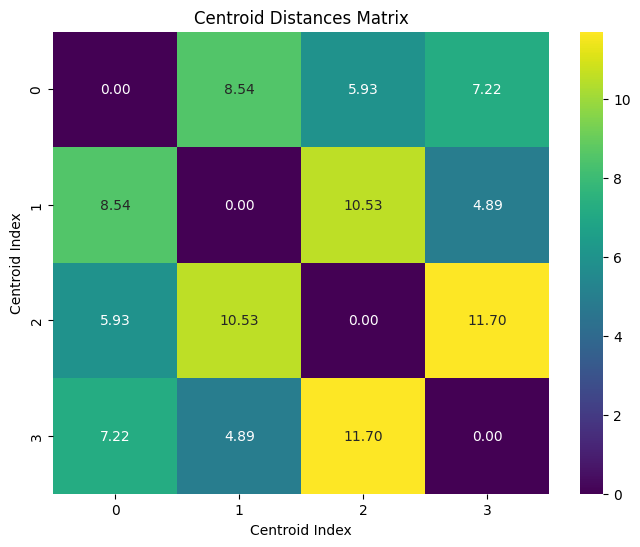

In [221]:
from scipy.spatial.distance import pdist, squareform
centroid_distances = pdist(centroids)

centroid_distances_matrix = squareform(centroid_distances)
plt.figure(figsize=(8, 6))
sns.heatmap(centroid_distances_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Centroid Distances Matrix')
plt.xlabel('Centroid Index')
plt.ylabel('Centroid Index')
plt.show()

In [222]:
cluster_means = df.groupby('Cluster').mean(numeric_only=True).round(2)
print(cluster_means)

# Nếu muốn dùng trung vị (ít bị ảnh hưởng bởi outliers)
# cluster_medians = df.groupby('Cluster').median(numeric_only=True)
# print(cluster_medians)

         Hãng Sản Xuất  Độ Dày  Trọng Lượng  Bộ Nhớ  Dung Lượng Pin  Giá Bán  \
Cluster                                                                        
0                 1.46    0.01        -0.07    0.13            0.25     0.81   
1                 6.47   -0.06        -0.13   -0.30           -0.14    -0.26   
2                 6.09   -0.14         0.19    0.53            0.45     1.07   
3                 1.66    0.12         0.16    0.26            0.01    -0.17   

         Số Lõi  Cache  Độ Phân Giải  Hãng GPU  
Cluster                                         
0          0.37   0.78         10.83      2.71  
1         -0.19  -0.26          4.13      2.37  
2          0.48   0.35         14.47      2.72  
3          0.03   0.03          3.75      2.45  


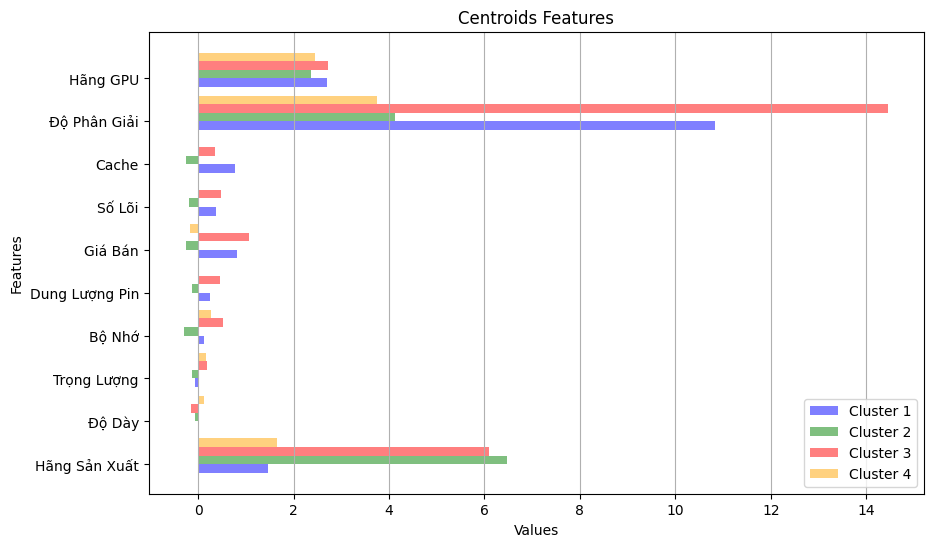

In [223]:
import numpy as np
# Màu cho từng cụm
df.drop(columns=['Cluster'], inplace=True)  # Xóa cột Cluster để vẽ biểu đồ
colors = ['blue', 'green', 'red', 'orange']  
centroids_df = pd.DataFrame(centroids, columns=df.columns)

# Lấy danh sách các đặc trưng
features = centroids_df.columns
plt.figure(figsize=(10, 6))
bar_width = 0.2  

for i in range(len(centroids)):
    bar_position = np.arange(len(features)) + i * bar_width  # Vị trí của mỗi cụm trên trục y
    plt.barh(bar_position, centroids[i], height=bar_width, color=colors[i % len(colors)], alpha=0.5, label=f'Cluster {i+1}')

plt.yticks(np.arange(len(features)) + 0.5 * bar_width, features)  # Đặt nhãn cho trục y
plt.xlabel('Values')
plt.ylabel('Features')
plt.title('Centroids Features')
plt.legend()
plt.grid(axis='x')
plt.show()

In [224]:
# cluster_means = df.groupby('Cluster').mean()

# cluster_means.T.plot(kind='bar', figsize=(12, 6))
# plt.title('So sánh trung bình các đặc trưng giữa các cụm')
# plt.xlabel('Đặc trưng')
# plt.ylabel('Giá trị trung bình')
# plt.legend(title='Cluster')
# plt.show()

In [225]:
centroid_names = []
for i in range(len(centroids)):
    centroid_info = centroids_df.iloc[i].sort_values(ascending=False)
    centroid_name = f"Nhóm {i+1}: "
    top_features = []
    for feature, value in centroid_info.items():
        if value > 0.5:  
            top_features.append(f"{feature}")
    centroid_name += ", ".join(top_features)
    centroid_names.append(centroid_name)

for i, centroid_name in enumerate(centroid_names):
    cluster_size = np.sum(clusters == i)
    print(f" {centroid_name}, Số lượng: {cluster_size}")

 Nhóm 1: Độ Phân Giải, Hãng GPU, Hãng Sản Xuất, Giá Bán, Cache, Số lượng: 141
 Nhóm 2: Hãng Sản Xuất, Độ Phân Giải, Hãng GPU, Số lượng: 594
 Nhóm 3: Độ Phân Giải, Hãng Sản Xuất, Hãng GPU, Giá Bán, Bộ Nhớ, Số lượng: 101
 Nhóm 4: Độ Phân Giải, Hãng GPU, Hãng Sản Xuất, Số lượng: 407


In [226]:
import pandas as pd
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

df_raw = pd.read_csv('../clean_data/clean_data_train/filled_data.csv')

In [227]:
df_raw['Cluster'] = clusters

In [228]:
df_raw.drop(columns=['Phân Loại'], inplace=True)

In [229]:
df_raw

,Hãng Sản Xuất,Độ Dày,Trọng Lượng,RAM,Bộ Nhớ,Dung Lượng Pin,Hệ Điều Hành,Giá Bán,Hãng CPU,Số Lõi,Xung nhịp tối đa,Cache,Loại Màn Hình,Độ Phân Giải,Số Cổng Giao Tiếp,Hãng GPU,Cluster
0,acer,19.9,1.30,8.0,512.0,61.154672,win 11,10490000.0,i3,12.0,4.5,10.0,ips,1920x1200,2,intel,3
1,acer,28.4,3.00,16.0,2048.0,61.154672,win 11,28490000.0,i5,8.0,4.7,18.0,ips,1920x1080,7,nvidia,3
2,hp,20.0,2.20,16.0,512.0,61.154672,win 11,21520000.0,ultra 5,3.0,4.3,12.0,ips,1920x1200,0,intel,1
3,asus,19.9,1.80,32.0,512.0,61.154672,win 11,16890000.0,i7,14.0,4.9,24.0,led/ips,1920x1080,3,intel,3
4,dell,22.0,2.10,16.0,512.0,61.154672,win 11,24590000.0,core 5,4.0,5.0,12.0,wva,2240x1400,4,nvidia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,apple,36.0,1.18,32.0,1024.0,61.154672,macos,42990000.0,m2,10.0,3.5,24.0,none,3840x2160,4,none,2
1239,apple,11.5,4.50,24.0,1024.0,61.154672,macos,55700000.0,m4,10.0,6.0,24.0,retina,4480x2520,4,apple gpu,2
1240,hp,19.9,1.52,8.0,512.0,61.154672,win 10,18990000.0,i5,4.0,4.2,12.0,led,1366x768,2,intel,1
1241,asus,18.0,1.50,16.0,1024.0,63.000000,win 11,29490000.0,ultra 5,8.0,4.5,8.0,ips,1920x1080,4,intel,3


In [230]:
numeric_cols = df_raw.select_dtypes(include=['number']).columns.tolist()
print(df_raw.groupby('Cluster')[numeric_cols].mean().round(2).T)

Cluster                      0            1            2            3
Độ Dày                   19.78        19.48        19.13        20.25
Trọng Lượng               1.78         1.75         1.96         1.94
RAM                      19.40        16.51        31.52        18.29
Bộ Nhớ                  753.93       482.15      1007.37       839.37
Dung Lượng Pin           63.52        59.56        65.63        61.04
Giá Bán            39326453.90  21600287.88  43676930.69  23145828.01
Số Lõi                   11.01         8.97        11.40         9.74
Xung nhịp tối đa          4.85         4.57         4.59         4.61
Cache                    21.66        15.06        18.95        16.90
Số Cổng Giao Tiếp         3.77         4.58         4.26         4.15
Cluster                   0.00         1.00         2.00         3.00


In [231]:
categorical_cols = df_raw.select_dtypes(include=['object', 'category']).columns.tolist()
# for col in categorical_cols:  # thay bằng tên cột phân loại
#     print(f"--- {col} ---")
#     print(df_raw.groupby('Cluster')[col].value_counts(normalize=True).unstack().round(2).T)
#     print()

In [232]:
# manufacturer_dist = df_raw.groupby('Cluster')['Hãng Sản Xuất'].value_counts(normalize=True).unstack().fillna(0)

# # Vẽ biểu đồ cho từng cụm
# for cluster_id in manufacturer_dist.index:
#     plt.figure(figsize=(8, 4))
#     manufacturer_dist.loc[cluster_id].sort_values(ascending=False).plot(kind='bar', color='skyblue')
#     plt.title(f"Tỷ lệ Hãng Sản Xuất trong Cụm {cluster_id}")
#     plt.ylabel("Tỷ lệ (%)")
#     plt.xlabel("Hãng")
#     plt.ylim(0, 1)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.tight_layout()
#     plt.show()

In [233]:
# manufacturer_dist.T.plot(kind='bar', figsize=(12, 6), width=0.8)
# plt.title("Tỷ lệ các Hãng Sản Xuất theo từng Cụm")
# plt.ylabel("Tỷ lệ (%)")
# plt.xlabel("Hãng Sản Xuất")
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.legend(title='Cluster')
# plt.tight_layout()
# plt.show()

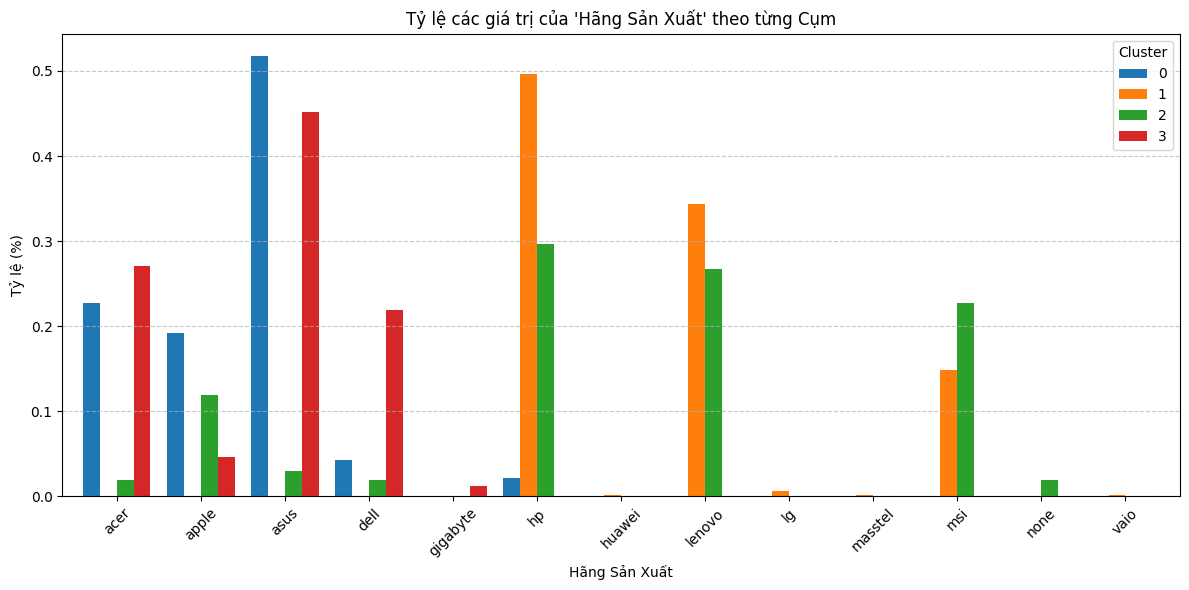

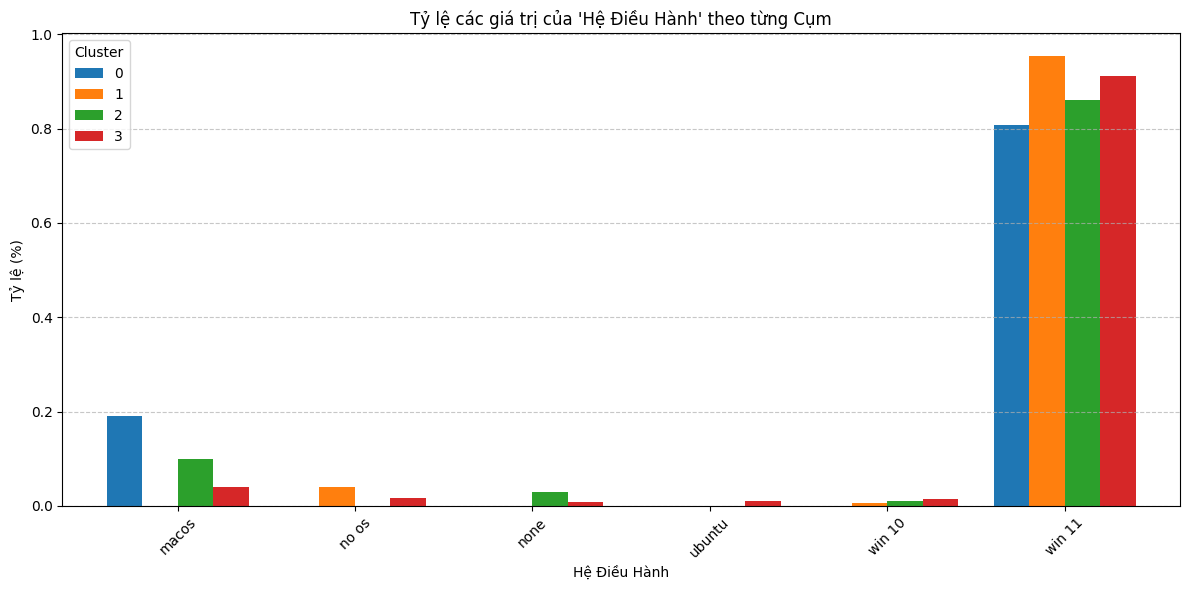

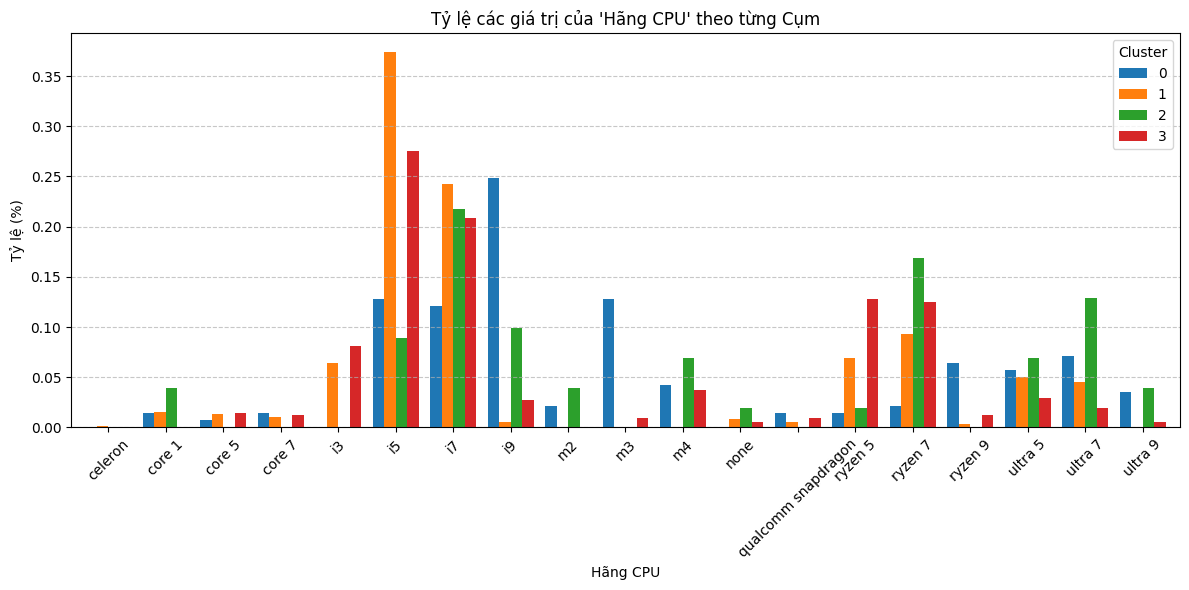

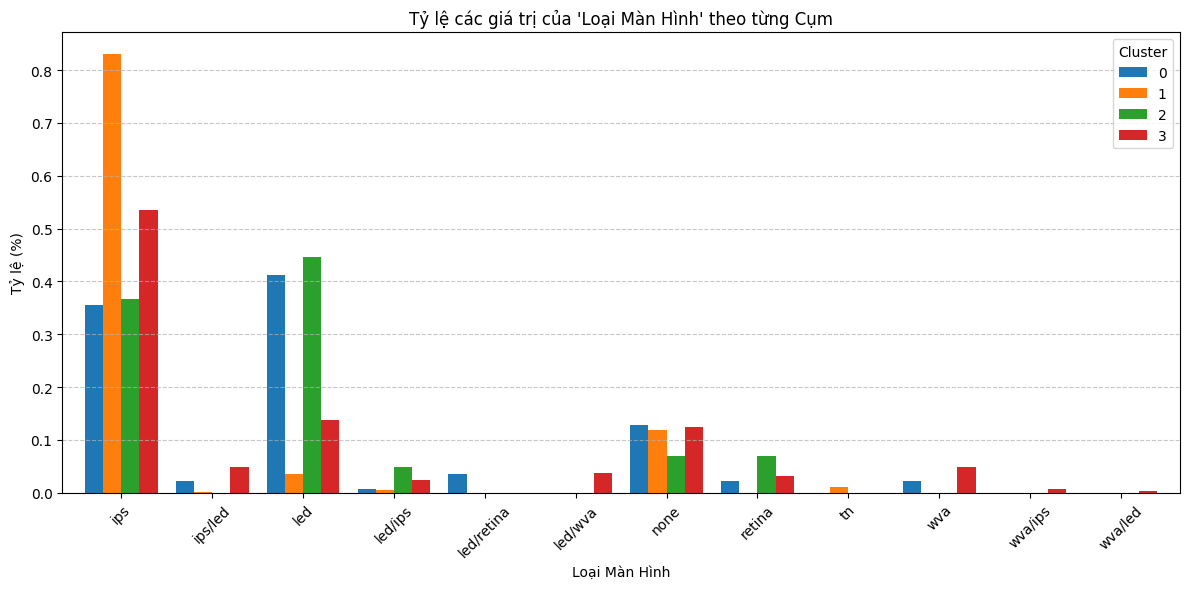

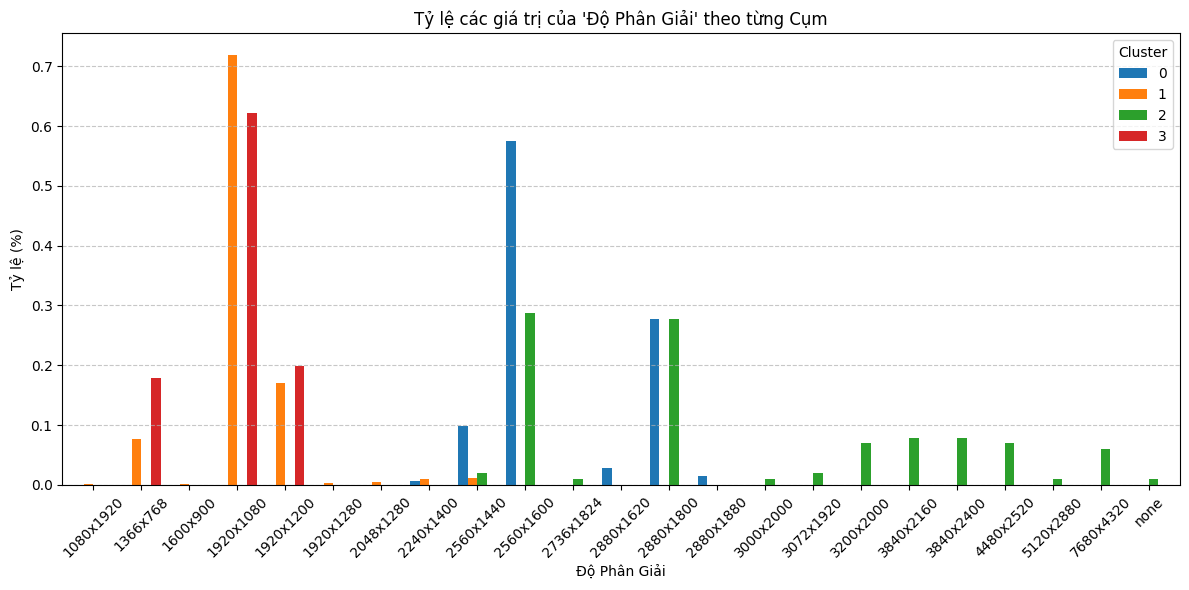

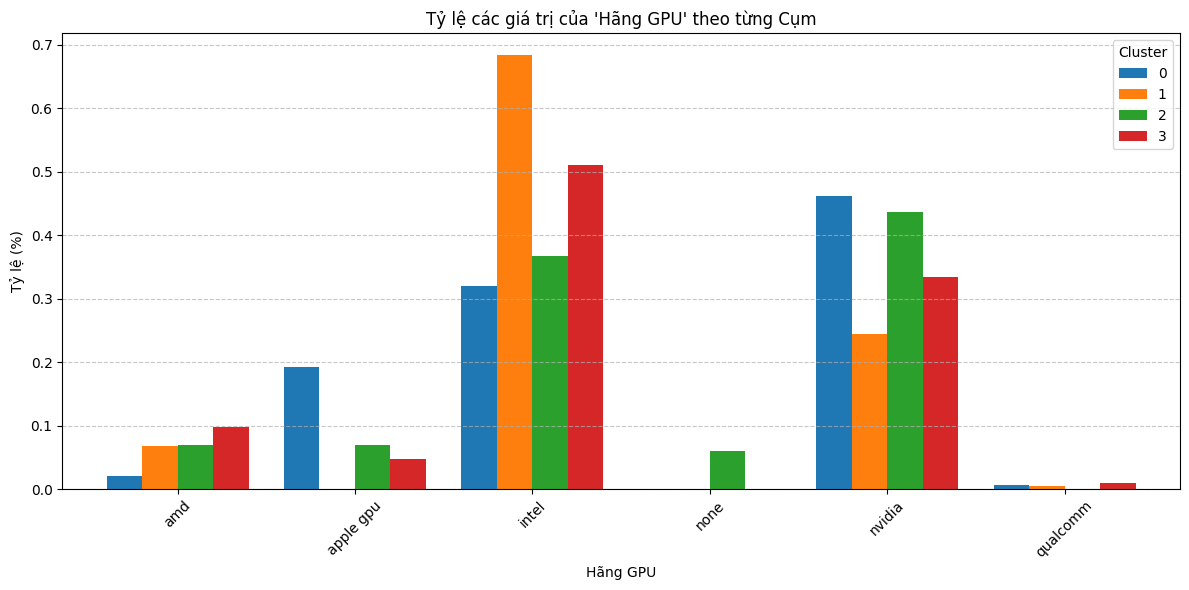

In [234]:
for col in categorical_cols:    
    # Tính tỷ lệ giá trị theo cụm
    dist = df_raw.groupby('Cluster')[col].value_counts(normalize=True).unstack().fillna(0)

    # # Bỏ cột nếu giá trị phân loại quá nhiều (để tránh biểu đồ quá dày)
    # if dist.shape[1] > 20:
    #     print(f"Bỏ qua {col} vì có quá nhiều giá trị ({dist.shape[1]}).")
    #     continue

    # Vẽ biểu đồ cột nhóm
    dist.T.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title(f"Tỷ lệ các giá trị của '{col}' theo từng Cụm")
    plt.ylabel("Tỷ lệ (%)")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()